In [1]:
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Read in the CSV file and create the Pandas DataFrame
df_project4 = pd.read_csv(
    "Starter_Data.csv"
)
# Review the DataFrame
df_project4.head()

,date,price_indextor,price_index_change,inflation_rate,canadian_prime_rate,cnd_tsx_indx,unemployment_rate,GDP_growth,CND_USD_exchange
0,2004-10-01,104.9,0.000,0.023,0.043,0.023,0.059,0.065,0.800
1,2004-11-01,105.2,0.003,0.024,0.043,0.018,0.059,0.065,0.835
2,2004-12-01,105.1,-0.001,0.021,0.043,0.024,0.059,0.065,0.824
3,2005-01-01,105.0,-0.001,0.019,0.043,-0.005,0.057,0.064,0.826
4,2005-02-01,105.6,0.006,0.021,0.043,0.050,0.057,0.064,0.806


In [3]:
# Remove white spaces
df_project4.columns = df_project4.columns.str.strip()
df_project4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 219 non-null    object 
 1   price_indextor       219 non-null    float64
 2   price_index_change   219 non-null    float64
 3   inflation_rate       219 non-null    float64
 4   canadian_prime_rate  219 non-null    float64
 5   cnd_tsx_indx         219 non-null    float64
 6   unemployment_rate    219 non-null    float64
 7   GDP_growth           219 non-null    float64
 8   CND_USD_exchange     219 non-null    float64
dtypes: float64(8), object(1)
memory usage: 15.5+ KB


In [4]:
column_to_scale = df_project4[["price_indextor","price_index_change","inflation_rate","canadian_prime_rate","cnd_tsx_indx","unemployment_rate","GDP_growth","CND_USD_exchange"]]

In [5]:
# Applying Scaler
scaler = StandardScaler()
project4_scaled = scaler.fit_transform(column_to_scale)

In [6]:
project4_scaled

array([[-1.56427223, -0.44523807,  0.14959647, ..., -0.05118592,
         0.4937341 , -0.60419126],
       [-1.54176151,  0.28974035,  0.21756664, ..., -0.05118592,
         0.4937341 , -0.24375098],
       [-1.54926509, -0.69023087,  0.01365611, ..., -0.05118592,
         0.4937341 , -0.35703221],
       ...,
       [ 2.26254993,  1.02471877,  3.27622468, ..., -1.68593609,
         1.71201039, -1.19125581],
       [ 2.29256422,  0.28974035,  3.20825451, ..., -1.68593609,
         1.71201039, -1.32603988],
       [ 2.26254993, -1.18021649,  2.86840361, ..., -1.68593609,
         1.71201039, -1.22595076]])

In [8]:
# Creating a DataFrame with with the scaled data
df_project4_transformed = pd.DataFrame(project4_scaled, columns=["Price_Index_Detail_Toronto_Monthly_All_Items","Price_Index_Change",	"Inflation Rate","Canadian_Prime_Rate",	"CND_TSX_Indx",	"Unemployment_Rate","GDP_growth","CND_USD_Exchange"])
df_project4_transformed.head() 

,Price_Index_Detail_Toronto_Monthly_All_Items,Price_Index_Change,Inflation Rate,Canadian_Prime_Rate,CND_TSX_Indx,Unemployment_Rate,GDP_growth,CND_USD_Exchange
0,-1.564272,-0.445238,0.149596,0.651019,0.481037,-0.051186,0.493734,-0.604191
1,-1.541762,0.289740,0.217567,0.651019,0.351586,-0.051186,0.493734,-0.243751
2,-1.549265,-0.690231,0.013656,0.651019,0.506927,-0.051186,0.493734,-0.357032
3,-1.556769,-0.690231,-0.122284,0.651019,-0.243888,-0.284722,0.470748,-0.336436
4,-1.511747,1.024719,0.013656,0.651019,1.180071,-0.284722,0.470748,-0.542402


In [9]:
# Drop the 'price_indextor' and 'CND_USD_exchange' columns from the DataFrame
# Plot average daily volume according to day of the week
#ohlcv_df = ohlcv_df.drop(columns=["price_indextor","CND_USD_exchange"])
df_project4_transformed.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [10]:
# Define features set X by selecting all columns but GDP_growth
X = df_project4_transformed.drop(columns=["GDP_growth"]).copy()

# Display the features DataFrame
X

,Price_Index_Detail_Toronto_Monthly_All_Items,Price_Index_Change,Inflation Rate,Canadian_Prime_Rate,CND_TSX_Indx,Unemployment_Rate,CND_USD_Exchange
0,-1.564272,-0.445238,0.149596,0.651019,0.481037,-0.051186,-0.604191
1,-1.541762,0.289740,0.217567,0.651019,0.351586,-0.051186,-0.243751
2,-1.549265,-0.690231,0.013656,0.651019,0.506927,-0.051186,-0.357032
3,-1.556769,-0.690231,-0.122284,0.651019,-0.243888,-0.284722,-0.336436
4,-1.511747,1.024719,0.013656,0.651019,1.180071,-0.284722,-0.542402
...,...,...,...,...,...,...,...
214,2.180011,-1.425209,3.344195,1.031468,-0.580460,-1.685936,-1.273580
215,2.187514,-0.200245,3.276225,1.792365,-1.305384,-1.685936,-1.170597
216,2.262550,1.024719,3.276225,2.267926,1.257741,-1.685936,-1.191256
217,2.292564,0.289740,3.208255,2.267926,1.257741,-1.685936,-1.326040


In [11]:
# Define target set by selecting the GDP_growth column
y = df_project4_transformed["GDP_growth"]

# Display a sample of y
y[:5]

0    0.493734
1    0.493734
2    0.493734
3    0.470748
4    0.470748
Name: GDP_growth, dtype: float64

In [12]:
# Split into training and testing windows
from sklearn.model_selection import train_test_split
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

7

In [15]:
# Define the number of neurons in the output layer
number_output_neurons = 5

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = (number_input_features + 1) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1

4

In [16]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = (hidden_nodes_layer1 + 1) // 2

# Review the number of hidden nodes in the second layer
hidden_nodes_layer2

2

In [17]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3 = (hidden_nodes_layer2 + 1) // 2

# Review the number of hidden nodes in the second layer
hidden_nodes_layer3

1

In [18]:
# Create the Sequential model instance
nn = Sequential()

In [19]:
# First hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, input_dim=number_input_features, activation="relu"))

# Third hidden layer
nn.add(Dense(units=hidden_nodes_layer3, input_dim=number_input_features, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation="linear"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 32        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 47 (188.00 Byte)
Trainable params: 47 (188.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Compile the Sequential model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [21]:
# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train, y_train, validation_split=0.3, epochs=200)

Epoch 1/200


4/4 [==============================] - 2s 119ms/step - loss: 0.9666 - mse: 0.9666 - val_loss: 1.0374 - val_mse: 1.0374
Epoch 2/200
4/4 [==============================] - 0s 22ms/step - loss: 0.9647 - mse: 0.9647 - val_loss: 1.0356 - val_mse: 1.0356
Epoch 3/200
4/4 [==============================] - 0s 22ms/step - loss: 0.9632 - mse: 0.9632 - val_loss: 1.0338 - val_mse: 1.0338
Epoch 4/200
4/4 [==============================] - 0s 19ms/step - loss: 0.9616 - mse: 0.9616 - val_loss: 1.0323 - val_mse: 1.0323
Epoch 5/200
4/4 [==============================] - 0s 20ms/step - loss: 0.9603 - mse: 0.9603 - val_loss: 1.0309 - val_mse: 1.0309
Epoch 6/200
4/4 [==============================] - 0s 18ms/step - loss: 0.9595 - mse: 0.9595 - val_loss: 1.0295 - val_mse: 1.0295
Epoch 7/200
4/4 [==============================] - 0s 20ms/step - loss: 0.9587 - mse: 0.9587 - val_loss: 1.0286 - val_mse: 1.0286
Epoch 8/200
4/4 [==============================] - 0s 21ms/step - loss: 0.9579 - mse: 0

In [22]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: 0.5001 - mse: 0.5001 - 44ms/epoch - 22ms/step
Loss: 0.5001277327537537, Accuracy: 0.5001277327537537


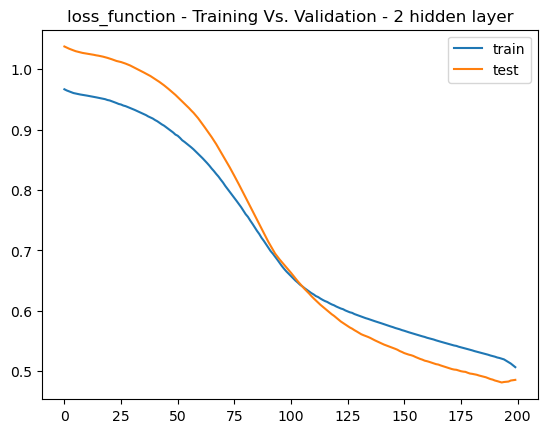

In [23]:
import matplotlib.pyplot as plt

# Train vs test for shallow net
plt.plot(fit_model.history["loss"])
plt.plot(fit_model.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layer")
plt.legend(["train", "test"])
plt.show()

In [24]:
# create a second deeper model (more layers)
# Define the model - deep neural net
number_input_features = 7
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 4
hidden_nodes_layer4 = 2

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation="linear"))

In [25]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X_train, y_train, validation_split=0.3, epochs=200)

Epoch 1/200
4/4 [==============================] - 2s 93ms/step - loss: 0.9954 - mse: 0.9954 - val_loss: 1.0705 - val_mse: 1.0705
Epoch 2/200
4/4 [==============================] - 0s 19ms/step - loss: 0.9866 - mse: 0.9866 - val_loss: 1.0693 - val_mse: 1.0693
Epoch 3/200
4/4 [==============================] - 0s 17ms/step - loss: 0.9813 - mse: 0.9813 - val_loss: 1.0682 - val_mse: 1.0682
Epoch 4/200
4/4 [==============================] - 0s 18ms/step - loss: 0.9775 - mse: 0.9775 - val_loss: 1.0681 - val_mse: 1.0681
Epoch 5/200
4/4 [==============================] - 0s 17ms/step - loss: 0.9744 - mse: 0.9744 - val_loss: 1.0677 - val_mse: 1.0677
Epoch 6/200
4/4 [==============================] - 0s 18ms/step - loss: 0.9714 - mse: 0.9714 - val_loss: 1.0676 - val_mse: 1.0676
Epoch 7/200
4/4 [==============================] - 0s 18ms/step - loss: 0.9692 - mse: 0.9692 - val_loss: 1.0674 - val_mse: 1.0674
Epoch 8/200
4/4 [==============================] - 0s 19ms/step - loss: 0.9671 - mse: 0.96

In [26]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: 0.1680 - mse: 0.1680 - 43ms/epoch - 21ms/step
Loss: 0.1680431365966797, Accuracy: 0.1680431365966797


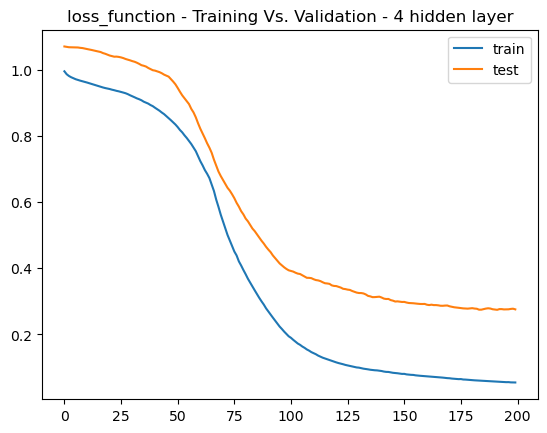

In [27]:
import matplotlib.pyplot as plt

# Train vs test for shallow net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 4 hidden layer")
plt.legend(["train", "test"])
plt.show()

In [28]:
# import tensorflow to save the model
import tensorflow as tf

In [35]:
# Save model in JSON format
nn_json = nn.to_json()

# Define a relative path to save the model
# The model should be saved with a .json file extension
file_path = "model.json"

# Write the model to the the file 
with open(file_path, "w") as json_file:
    json_file.write(nn_json)

# Define a relative path to save the model weights
# The model weights should be saved with a .h5 file extension
file_path = "model.h5"

nn.save_weights(file_path)